In [543]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import datetime
from scipy import stats

In [544]:
df = pd.read_csv("/home/sscf/vol_products_ftx/user_data/Binance_BTCUSDT_d.csv")
df = df.drop(columns = ["unix", "symbol", "Volume BTC", "tradecount", "high", "low", "Volume USDT"])
df["date"] = pd.to_datetime(df["date"])
df["MOVE"] = np.absolute(df["close"] - df["open"])  # Calculate abs value of close - open
df["MOVE_perc"] = df["MOVE"] / df["open"]  # Calculate the percent value also.
df["perc_change"] = (df["close"] - df["open"]) / df["open"]
df["10dvol"] = df["perc_change"].rolling(10).std()  # Calculate rolling 10 day vol.
df["10dvol"] = df["10dvol"].shift(periods = 1)  # Take previous day's vol.
df["10dvol"] = df["10dvol"].fillna(0)  # Replace NaN values with 0.
df

,date,open,close,MOVE,MOVE_perc,perc_change,10dvol
0,2022-10-12,19060.00,19081.46,21.46,0.001126,0.001126,0.000000
1,2022-10-11,19131.87,19060.00,71.87,0.003757,-0.003757,0.000000
2,2022-10-10,19439.96,19131.87,308.09,0.015848,-0.015848,0.000000
3,2022-10-09,19416.52,19439.02,22.50,0.001159,0.001159,0.000000
4,2022-10-08,19530.09,19417.96,112.13,0.005741,-0.005741,0.000000
...,...,...,...,...,...,...,...
1879,2017-08-21,4086.29,4016.00,70.29,0.017201,-0.017201,0.021504
1880,2017-08-20,4139.98,4086.29,53.69,0.012969,-0.012969,0.022558
1881,2017-08-19,4108.37,4139.98,31.61,0.007694,0.007694,0.023159
1882,2017-08-18,4285.08,4108.37,176.71,0.041238,-0.041238,0.019578


Text(0.5, 1.0, '10 day rolling Volatility')

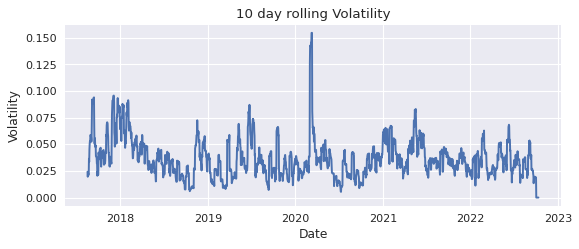

In [545]:
figure(figsize=(8, 3), dpi=80)
plt.plot(df["date"], df["10dvol"])
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("10 day rolling Volatility")

Text(0.5, 1.0, 'Cumulative histogram of BTC daily moves')

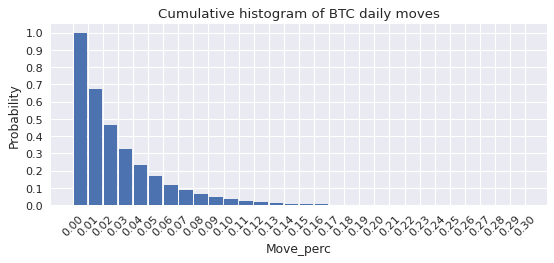

In [546]:
mpl.style.use("seaborn")
figure(figsize=(8, 3), dpi=80)
plt.hist(df["MOVE_perc"], bins = 30, range = (0, 0.3), density = True, cumulative = -1, rwidth = 0.9)
plt.xlabel("Move_perc")
plt.ylabel("Probability")
plt.xticks(np.arange(0, 0.31, 0.01))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(rotation = 45)
plt.title("Cumulative histogram of BTC daily moves")

# Cumulative histogram. Probability of a move greater than 0% is 100%. Probability of a move greater than 1% is ~68%. Probability of a move greater than 2% is ~48% and so on.

In [547]:
pearsonr = stats.pearsonr(df["MOVE_perc"], df["10dvol"])
pearsonr[0]

# Pearson r is 0.22, weak positive relationship.

0.2221450397187243

(0.0, 0.08)

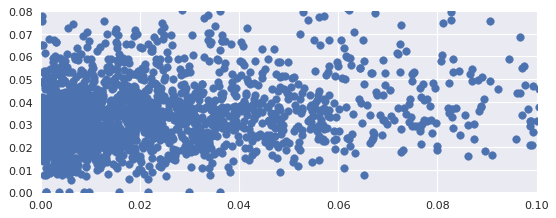

In [548]:
figure(figsize=(8, 3), dpi=80)
plt.scatter(df["MOVE_perc"], df["10dvol"])
plt.xlim([0, 0.10])
plt.ylim([0, 0.08])

# Scatterplots distribution.

In [549]:
# Economic news release dates since 01.01.2021

man_pmi = ["2022-10-03", "2022-09-01", "2022-08-01", "2022-07-01", "2022-06-01", "2022-05-02", "2022-04-01", "2022-03-01", "2022-02-01", "2022-01-04", "2021-12-01", "2021-11-01",
           "2021-10-01", "2021-09-01", "2021-08-02", "2021-07-01", "2021-06-01", "2021-05-03", "2021-04-01", "2021-03-01", "2021-02-01", "2021-01-05"]
employment = ["2022-10-07", "2022-09-02", "2022-08-05", "2022-08-05", "2022-07-08", "2022-06-03", "2022-05-06", "2022-04-01", "2022-03-04", "2022-02-04", "2022-01-07",
              "2021-12-03" , "2021-11-05" , "2021-10-08" , "2021-09-03" , "2021-08-06" , "2021-07-02" , "2021-06-04" , "2021-05-07" , "2021-04-02" , "2021-03-05" , "2021-02-05",
              "2021-01-08"]
gdp = ["2022-07-28", "2022-04-28", "2022-01-27", "2021-10-28", "2021-07-29", "2021-04-29", "2021-01-28"]
cpi = ["2022-09-13", "2022-08-10", "2022-07-13", "2022-06-10", "2022-05-11", "2022-04-12", "2022-03-10", "2022-02-10", "2022-01-12", "2021-12-10", "2021-11-10", "2021-10-13",
       "2021-09-14", "2021-08-11", "2021-07-13", "2021-06-10", "2021-05-12", "2021-04-13", "2021-03-10", "2021-02-10", "2021-01-13"]
pce = ["2022-09-30", "2022-08-26", "2022-07-29",
       "2022-06-30", "2022-05-27", "2022-04-29", "2022-03-31", "2022-02-25", "2022-01-28", "2021-12-23", "2021-11-24", "2021-10-29", "2021-10-01", "2021-08-27", "2021-07-30",
       "2021-06-25", "2021-05-28", "2021-04-30", "2021-03-26", "2021-02-26", "2021-01-29"]
fomc = ["2022-09-21", "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", "2022-01-26", "2021-12-15", "2021-11-03", "2021-09-22", "2021-07-28", "2021-06-16", "2021-04-28",
        "2021-03-17", "2021-01-27"]

# Aggregated lists:

inflation = list(set(cpi + pce))
prio1 = list(set(inflation + fomc + gdp))
prio2 = list(set(man_pmi + employment))
release_day = list(set(prio1 + prio2))
#none_day

In [555]:
df["MOVE_perc"].loc[df["date"].isin(prio1)]

12     0.008572
21     0.021879
29     0.099211
47     0.061134
63     0.034673
         ...   
609    0.034744
621    0.026493
622    0.098895
623    0.064621
637    0.097572
Name: MOVE_perc, Length: 63, dtype: float64

Text(0.5, 1.0, 'Cumulative histogram of BTC moves, on days when inflation, advance gdp or fed funds rate data is released.')

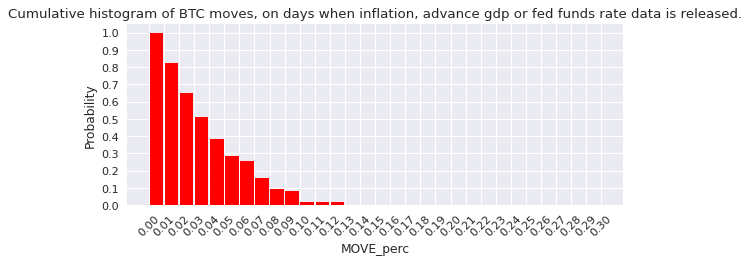

In [553]:
# prio1 histogram
figure(figsize=(8, 3), dpi=80)
plt.hist(df["MOVE_perc"].loc[df["date"].isin(prio1)], bins = 30, range = (0, 0.3), density = True, cumulative = -1,  color = "r", rwidth = 0.9)
plt.xlabel("MOVE_perc")
plt.ylabel("Probability")
plt.xticks(np.arange(0, 0.31, 0.01))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(rotation = 45)
plt.title("Cumulative histogram of BTC moves, on days when inflation, advance gdp or fed funds rate data is released.")

Text(0.5, 1.0, 'Cumulative histogram of BTC moves, on days when no data is released.')

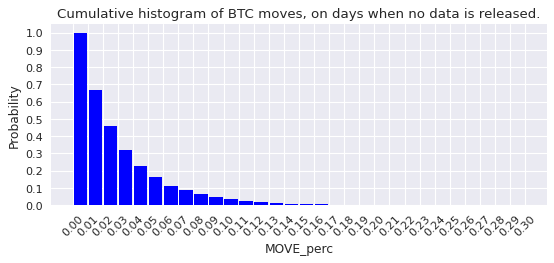

In [552]:
#none_day histogram:
figure(figsize=(8, 3), dpi=80)
plt.hist(df["MOVE_perc"].loc[~df["date"].isin(release_day)], bins = 30, range = (0, 0.3), density = True, cumulative = -1,  color = "b", rwidth = 0.9)
plt.xlabel("MOVE_perc")
plt.ylabel("Probability")
plt.xticks(np.arange(0, 0.31, 0.01))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(rotation = 45)
plt.title("Cumulative histogram of BTC moves, on days when no data is released.")